## student for marks prediction

In [ ]:
#import libary 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Load Data set

In [ ]:
path = r"/student_info (1).csv"
df = pd.read_csv(path,error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3288: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  async def run_code(self, code_obj, result=None, *, async_=False):


In [ ]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [ ]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [ ]:
print(df.shape)

(200, 2)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [ ]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


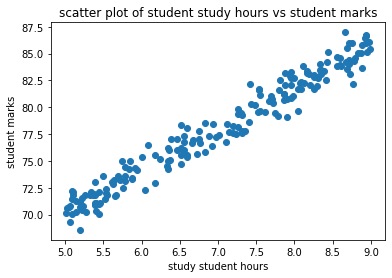

In [ ]:
plt.scatter(x = df.study_hours, y=df.student_marks)
plt.xlabel("study student hours")
plt.ylabel("student marks")
plt.title("scatter plot of student study hours vs student marks")
plt.show()

Preparing the data for machine learning alogrithm

# Data clearning

In [ ]:
df.isnull()

,study_hours,student_marks
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [ ]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [ ]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [ ]:
df2 = df.fillna(df.mean())

In [ ]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [ ]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


# Data Spilt set

In [ ]:
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]


In [ ]:
print("shape of X=",X.shape)
print("shape of y=",y.shape)

shape of X= (200, 1)
shape of y= (200,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
print("shape of X_train",X_train.shape)
print("shape of y_train",y_train.shape)
print("shape of X_test",X_test.shape)
print("shape of y_test",y_test.shape)

shape of X_train (160, 1)
shape of y_train (160,)
shape of X_test (40, 1)
shape of y_test (40,)


# Select the model and train it trainer formala y=m*X+c

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
reg = LinearRegression()



In [ ]:
# Train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
reg.coef_

array([3.92640681])

In [ ]:
reg.intercept_

50.43835070056992

In [ ]:
m = 3.92
c = 50.43
y = m * 4 + c

In [ ]:
y

66.11

In [ ]:
reg.predict([[4]])

array([66.14397795])

In [ ]:
reg.predict([[4]])[0].round(2)

66.14

In [ ]:
# Make predictions on the testing set
y_pred = reg.predict(X_test)
y_pred

array([74.35016819, 76.15631533, 82.36003809, 80.00419401, 75.48882617,
       73.17224615, 82.83120691, 70.81640206, 71.60168343, 74.70354481,
       81.29990825, 84.44103371, 71.56241936, 70.42376138, 85.26557914,
       73.17224615, 73.01518988, 82.16371775, 76.58822008, 70.34523325,
       84.55882591, 75.41029803, 83.02752725, 81.45696453, 71.83726783,
       71.99432411, 77.45202958, 82.87047098, 84.79441032, 77.25570924,
       76.94159669, 83.459432  , 84.55882591, 74.15384785, 71.60168343,
       78.82627196, 83.14531946, 70.62008172, 81.33917232, 70.50228952])

In [ ]:
pd.DataFrame(np.c_[X_test, y_test, y_pred],columns=["study_hours","student_marks_orginal","student_marks_predicted"])

,study_hours,student_marks_orginal,student_marks_predicted
0,6.09,76.48,74.350168
1,6.55,76.03,76.156315
2,8.13,82.27,82.360038
3,7.53,81.57,80.004194
4,6.38,77.01,75.488826
5,5.79,74.44,73.172246
6,8.25,82.79,82.831207
7,5.19,71.18,70.816402
8,5.39,73.02,71.601683
9,6.18,72.96,74.703545


# Fine-tune your model

In [ ]:
reg.score(X_test, y_test)

0.942580760104548

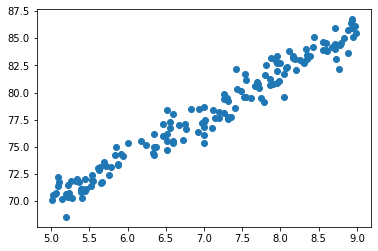

In [ ]:
plt.scatter(X_train, y_train)

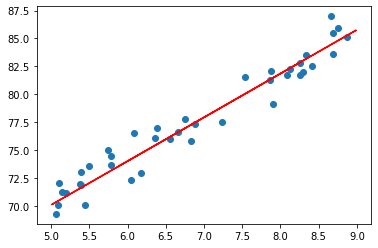

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_train, reg.predict(X_train), color="r")

Present your Solution
# Save machine learning model

In [ ]:
import joblib
joblib.dump(reg, "student_marks_prediction_model.pkl")

['student_marks_prediction_model.pkl']

In [ ]:
model = joblib.load("student_marks_prediction_model.pkl")

In [71]:
model.predict([[5]])[0].round(2)

70.07